In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import time

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer,f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("kidney_disease.csv")   

In [3]:
print("Shape of dataset :", df.shape)
# df.head()
df

Shape of dataset : (400, 26)


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


# Data Exploration

In [4]:
for i in df.drop("id",axis=1).columns:
    print('unique values in "{}":\n'.format(i),df[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "al":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "su":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "rbc":
 [nan 'normal' 'abnormal']
unique values in "pc":
 ['normal' 'abnormal' nan]
unique values in "pcc":
 ['notpresent' 'present' nan]
unique values in "ba":
 ['notpresent' 'present' nan]
unique values in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79.

In [5]:
for i in range(df.shape[0]):
    if df.iloc[i,25]=='ckd\t':
        df.iloc[i,25]='ckd'
    if df.iloc[i,20] in [' yes','\tyes']:
        df.iloc[i,20]='yes'
    if df.iloc[i,20]=='\tno':
        df.iloc[i,20]='no'
    if df.iloc[i,21]=='\tno':
        df.iloc[i,21]='no'
    if df.iloc[i,16]=='\t?':
        df.iloc[i,16]=np.nan
    if df.iloc[i,16]=='\t43':
        df.iloc[i,16]='43'
    if df.iloc[i,17]=='\t?':
        df.iloc[i,17]=np.nan
    if df.iloc[i,17]=='\t6200':
        df.iloc[i,17]= '6200'
    if df.iloc[i,17]=='\t8400':
        df.iloc[i,17]= '6200'
    if df.iloc[i,18]=='\t?':
        df.iloc[i,18]=np.nan
    if df.iloc[i,25]=='ckd':
        df.iloc[i,25]='yes'
    if df.iloc[i,25]=='notckd':
        df.iloc[i,25]='no'

In [6]:
df.drop('id',axis=1,inplace=True)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,yes
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,yes
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,yes


In [7]:
feature_names=['Age','Blood Pressure (mm/Hg)','Specific Gravity','Albumin','Sugar','Red Blood Cells',
               'Pus Cells','Pus Cell Clumps','Bacteria','Blood Glucose Random (mgs/dL)','Blood Urea (mgs/dL)',
               'Serum Creatinine (mgs/dL)','Sodium (mEq/L)','Potassium (mEq/L)','Hemoglobin (gms)','Packed Cell Volume',
               'White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)','Hypertension','Diabetes Mellitus',
               'Coronary Artery Disease','Appetite','Pedal Edema','Anemia','Chronic_Kidney_Disease']
df.columns=feature_names

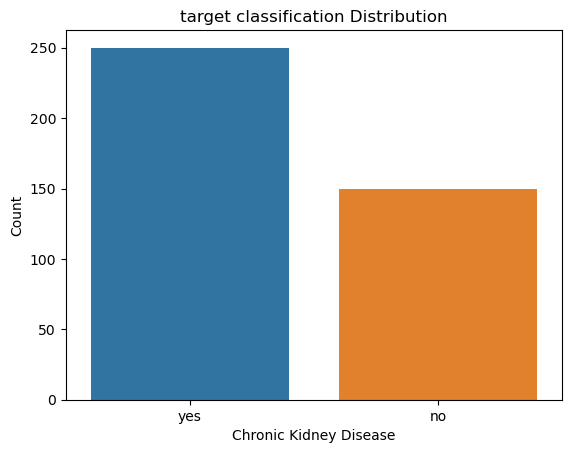

In [8]:
sns.countplot(x='Chronic_Kidney_Disease',data=df)
plt.xlabel("Chronic Kidney Disease")
plt.ylabel("Count")
plt.title("target classification Distribution")
plt.show()

/Users/raihanwibowo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/raihanwibowo/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


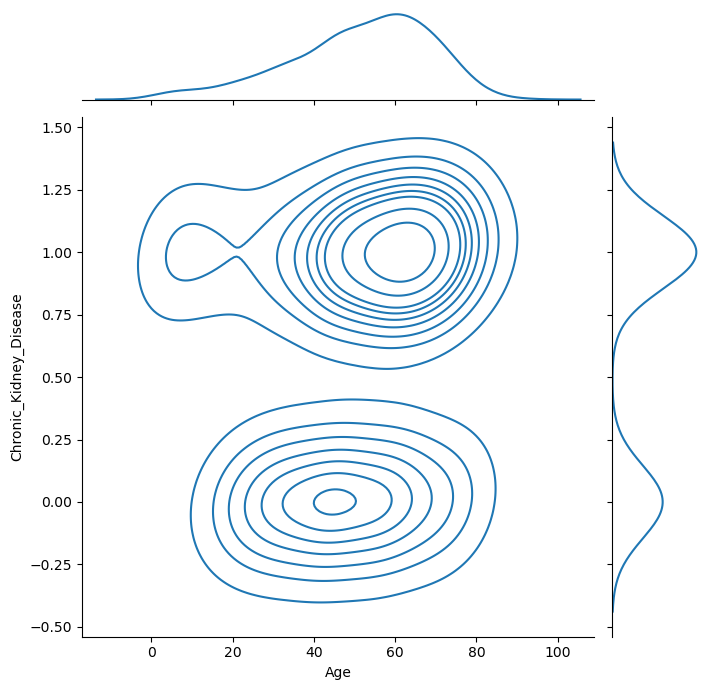

In [9]:
#Check distribution between age and ckd presence
# KDE is used to study PDF of a continuous RV
df["Chronic_Kidney_Disease"] = [1 if i == "yes" else 0 for i in df["Chronic_Kidney_Disease"]]

sns.jointplot(df.Age, df.Chronic_Kidney_Disease, kind="kde", size=7)

Inferences 
1. nockd - concentrated more around age=40
2. ckd - concentrated more around age = 65

/Users/raihanwibowo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/raihanwibowo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


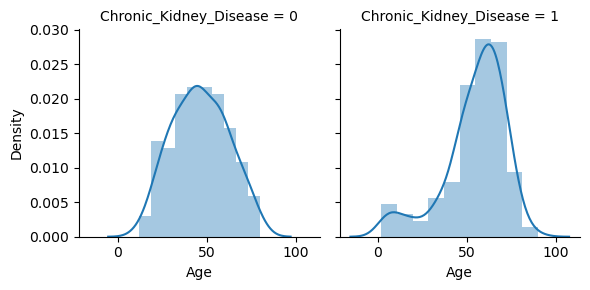

In [10]:
# Check distribution of age for each target class
g = sns.FacetGrid(df,col="Chronic_Kidney_Disease")
g.map(sns.distplot,"Age", bins=10)
plt.show()

In [11]:
mistyped=['Packed Cell Volume','White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)']
numeric=[]
for i in df.columns:
    if df[i].dtype=='float64':
        numeric.append(i)
numeric=numeric+mistyped

In [12]:
for col in mistyped:
        df[col]=df[col].astype('float')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             391 non-null    float64
 1   Blood Pressure (mm/Hg)          388 non-null    float64
 2   Specific Gravity                353 non-null    float64
 3   Albumin                         354 non-null    float64
 4   Sugar                           351 non-null    float64
 5   Red Blood Cells                 248 non-null    object 
 6   Pus Cells                       335 non-null    object 
 7   Pus Cell Clumps                 396 non-null    object 
 8   Bacteria                        396 non-null    object 
 9   Blood Glucose Random (mgs/dL)   356 non-null    float64
 10  Blood Urea (mgs/dL)             381 non-null    float64
 11  Serum Creatinine (mgs/dL)       383 non-null    float64
 12  Sodium (mEq/L)                  313 

In [14]:
categoricals=[]
for col in df.columns:
    if not col in numeric:
        categoricals.append(col)

In [15]:
style.use('fivethirtyeight')

/Users/raihanwibowo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/raihanwibowo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/raihanwibowo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

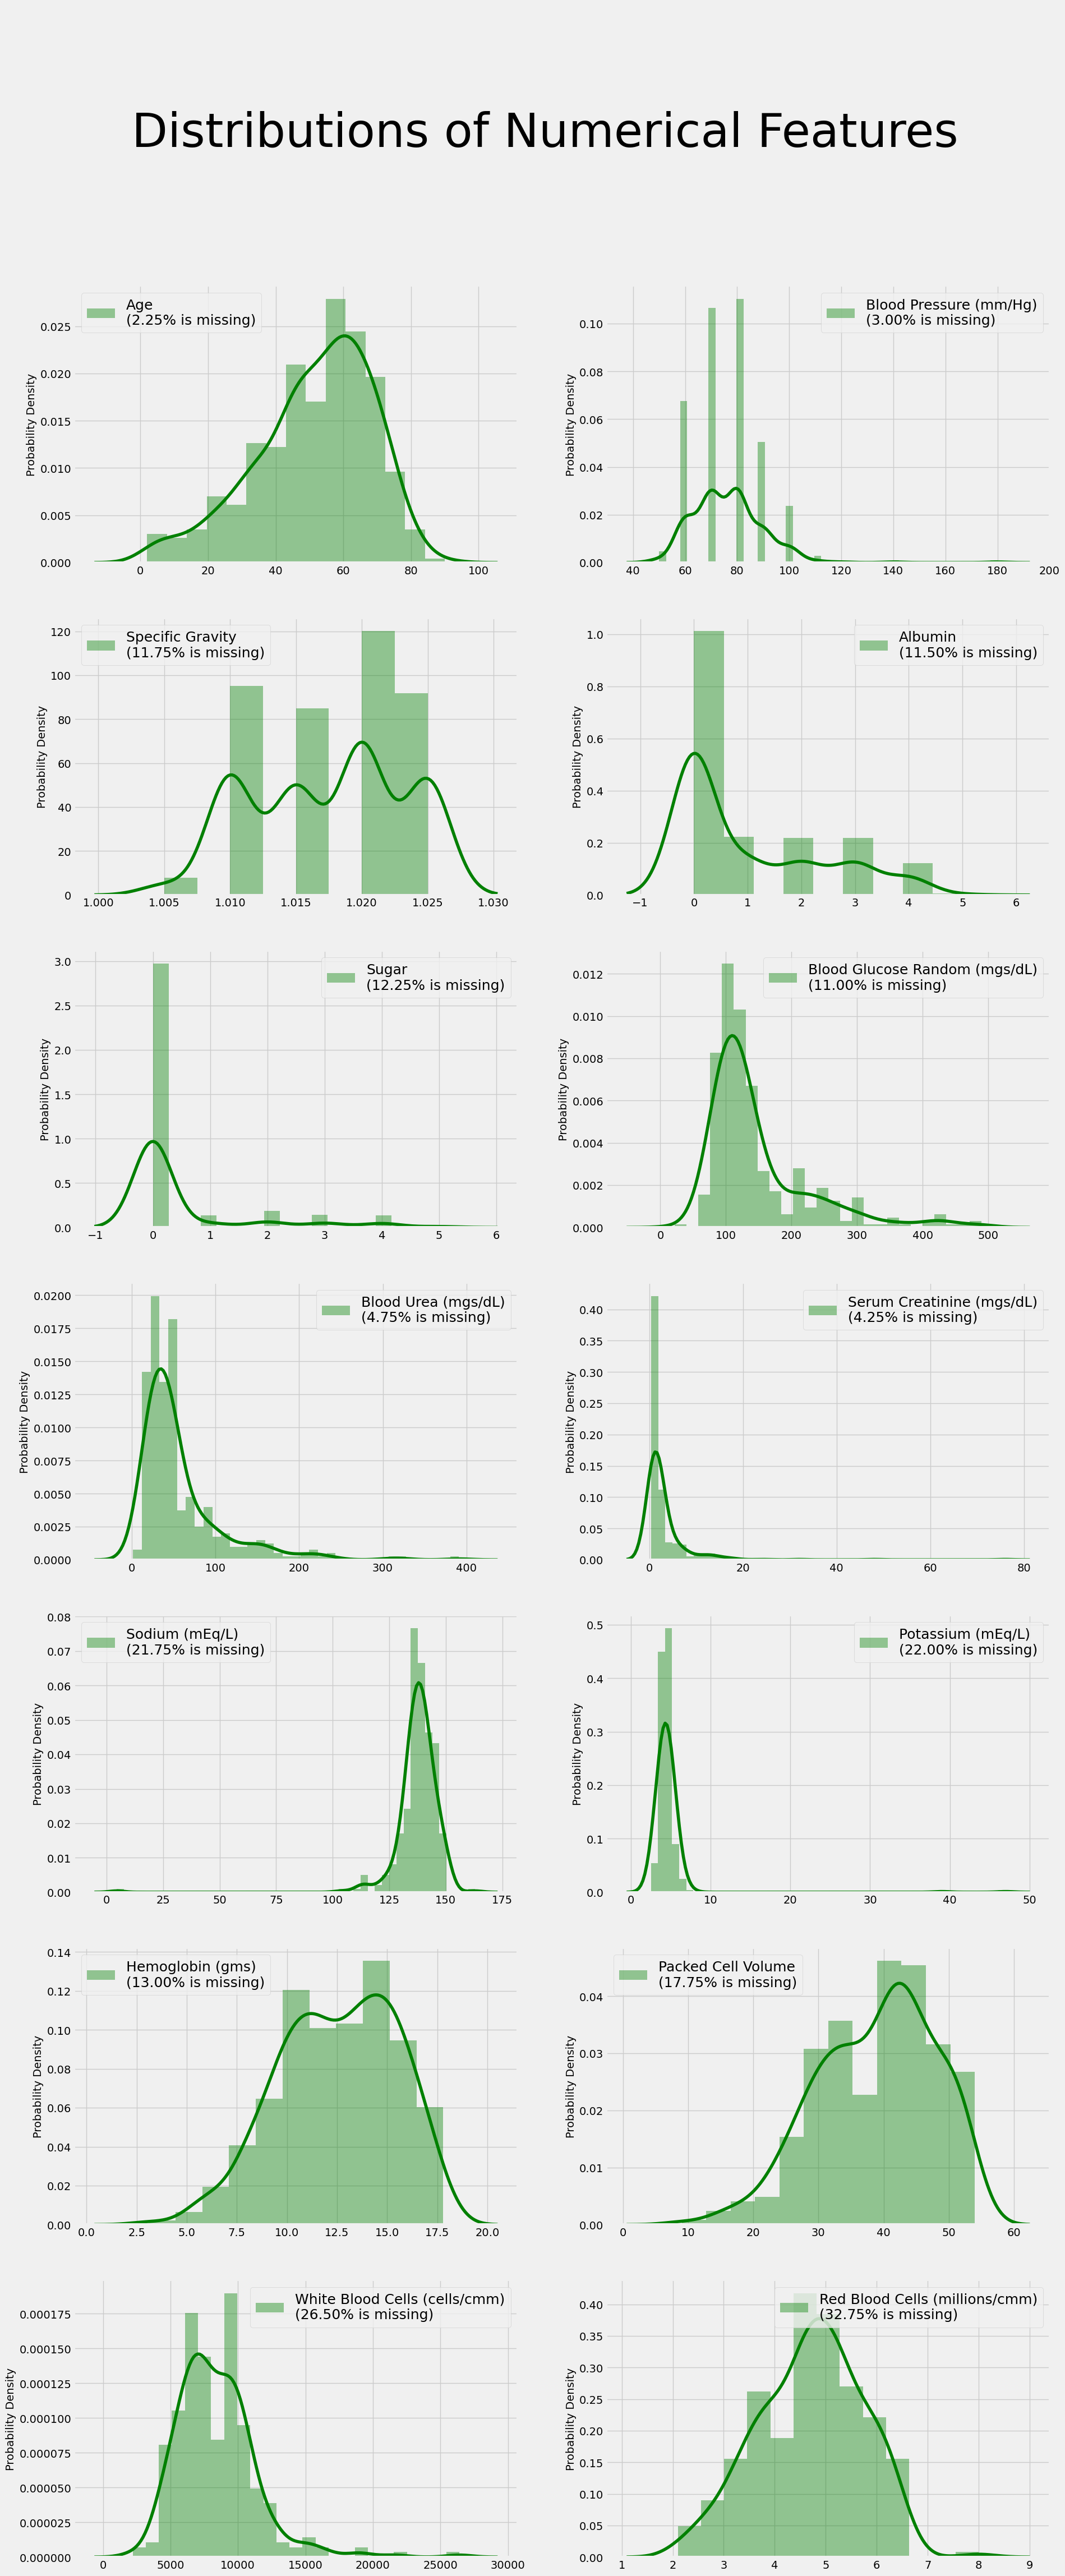

In [16]:
n_rows, n_cols = (7,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 50))
figure.suptitle('\n\nDistributions of Numerical Features', fontsize=60)

for index, column in enumerate(numeric):
    
    i,j = (index // n_cols), (index % n_cols)
    
    miss_perc="%.2f"%(100*(1-(df[column].dropna().shape[0])/df.shape[0]))
    
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    fig=sns.distplot(df[column], color="g", label=collabel, norm_hist=True,
    
    ax=axes[i,j], kde_kws={"lw":4})
    
    fig=fig.legend(loc='best', fontsize=18)
    
    axes[i,j].set_ylabel("Probability Density",fontsize='medium')
    
    axes[i,j].set_xlabel(None)

plt.savefig('numerical.jpg')

In [17]:
style.use('seaborn-darkgrid')

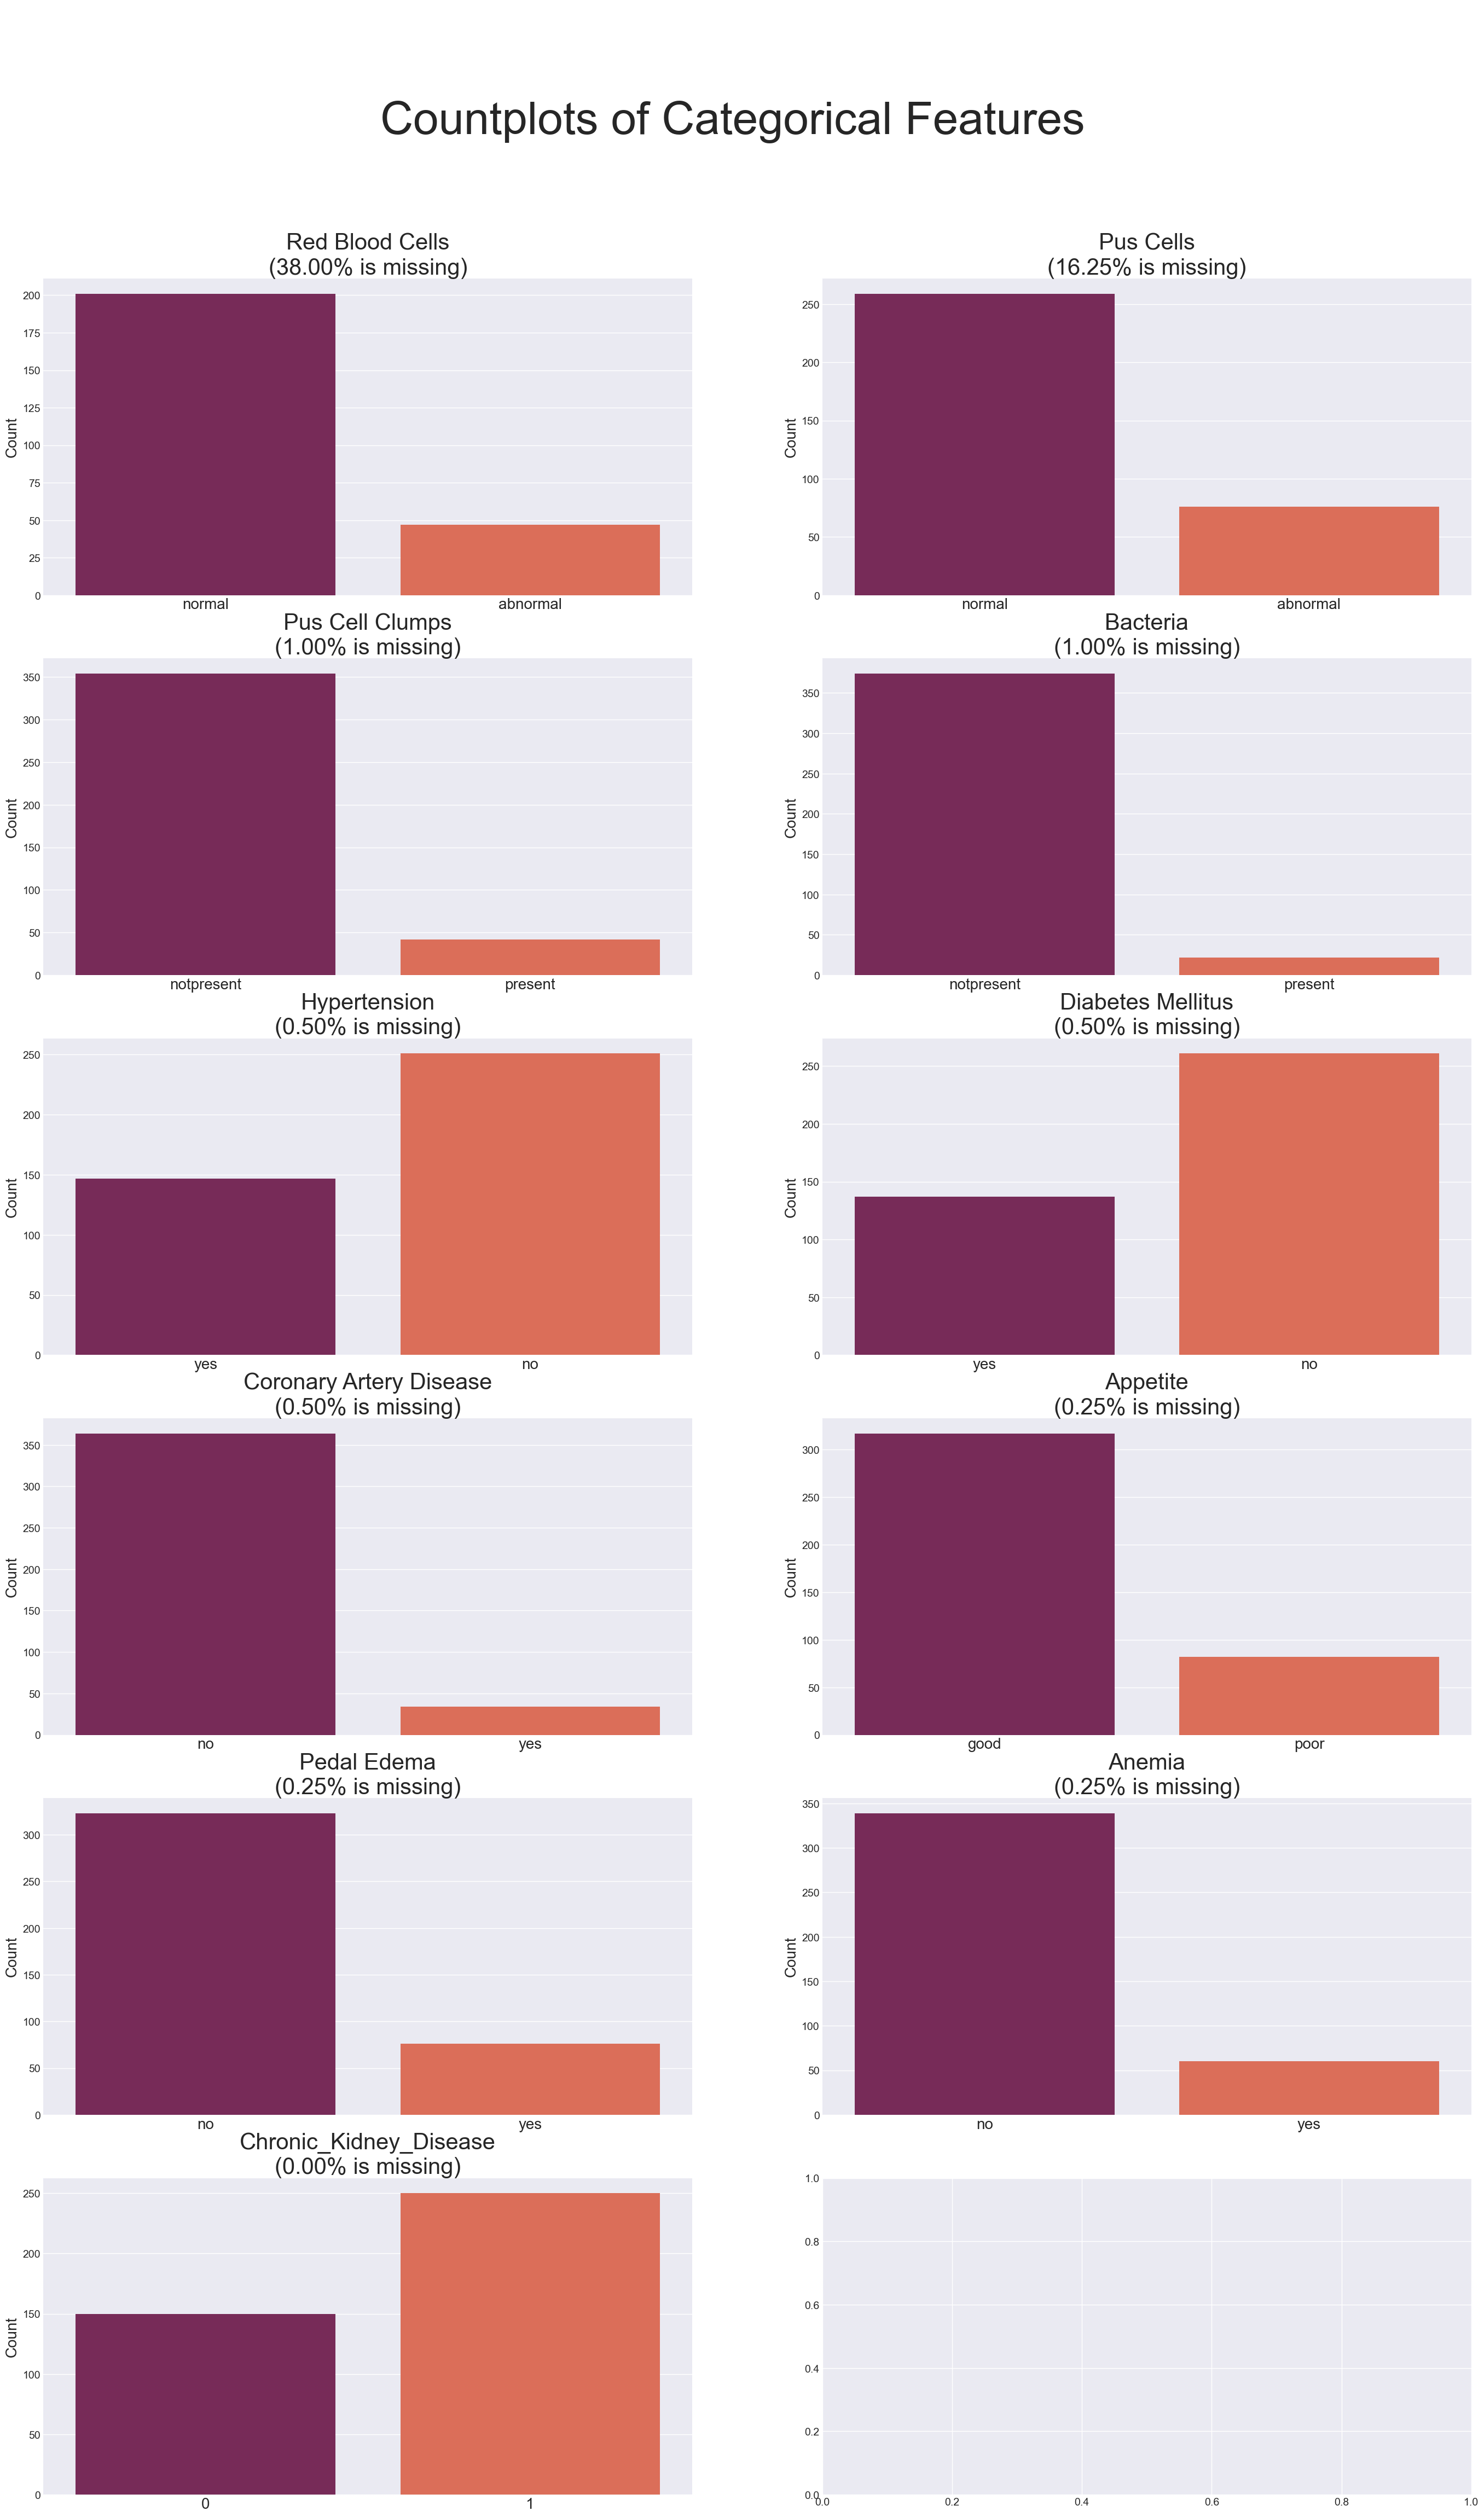

In [18]:
n_rows, n_cols = (6,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(30, 50))
figure.suptitle('\n\nCountplots of Categorical Features', fontsize=60)

for index, column in enumerate(categoricals):
    
    i,j = index // n_cols, index % n_cols
    
    miss_perc="%.2f"%(100*(1-(df[column].dropna().shape[0])/df.shape[0]))
    
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    fig = sns.countplot(x=column, data=df,label=collabel, palette='rocket',
    
    ax=axes[i,j])
    
    axes[i,j].set_title(collabel,fontsize=30)
    
    axes[i,j].set_xlabel(None)
    
    axes[i,j].set_ylabel("Count",fontsize=20)
    
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), fontsize=20)

plt.show()

In [19]:
df.isna().sum()

Age                                 9
Blood Pressure (mm/Hg)             12
Specific Gravity                   47
Albumin                            46
Sugar                              49
Red Blood Cells                   152
Pus Cells                          65
Pus Cell Clumps                     4
Bacteria                            4
Blood Glucose Random (mgs/dL)      44
Blood Urea (mgs/dL)                19
Serum Creatinine (mgs/dL)          17
Sodium (mEq/L)                     87
Potassium (mEq/L)                  88
Hemoglobin (gms)                   52
Packed Cell Volume                 71
White Blood Cells (cells/cmm)     106
Red Blood Cells (millions/cmm)    131
Hypertension                        2
Diabetes Mellitus                   2
Coronary Artery Disease             2
Appetite                            1
Pedal Edema                         1
Anemia                              1
Chronic_Kidney_Disease              0
dtype: int64

In [20]:
df.head()

,Age,Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic_Kidney_Disease
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,1


# Preprocessing

In [21]:
df['Red Blood Cells']=df['Red Blood Cells'].replace({'normal':1,'abnormal':0})
df['Pus Cells']=df['Pus Cells'].replace({'normal':1,'abnormal':0})
df['Pus Cell Clumps']=df['Pus Cell Clumps'].replace({'notpresent':0,'present':1})
df['Hypertension']=df['Hypertension'].replace({'no':0,'yes':1})
df['Diabetes Mellitus']=df['Diabetes Mellitus'].replace({'no':0,'yes':1})
df['Coronary Artery Disease']=df['Coronary Artery Disease'].replace({'no':0,'yes':1})
df['Pedal Edema']=df['Pedal Edema'].replace({'no':0,'yes':1})
df['Anemia']=df['Anemia'].replace({'no':0,'yes':1})
df['Appetite']=df['Appetite'].replace({'poor':0,'good':1})
df['Bacteria']=df['Bacteria'].replace({'notpresent':0,'present':1})
df['Chronic_Kidney_Disease']=df['Chronic_Kidney_Disease'].replace({'no':0,'yes':1})

In [22]:
df.head()

,Age,Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic_Kidney_Disease
0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38.0,6000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [23]:
df.isna().sum()

Age                                 9
Blood Pressure (mm/Hg)             12
Specific Gravity                   47
Albumin                            46
Sugar                              49
Red Blood Cells                   152
Pus Cells                          65
Pus Cell Clumps                     4
Bacteria                            4
Blood Glucose Random (mgs/dL)      44
Blood Urea (mgs/dL)                19
Serum Creatinine (mgs/dL)          17
Sodium (mEq/L)                     87
Potassium (mEq/L)                  88
Hemoglobin (gms)                   52
Packed Cell Volume                 71
White Blood Cells (cells/cmm)     106
Red Blood Cells (millions/cmm)    131
Hypertension                        2
Diabetes Mellitus                   2
Coronary Artery Disease             2
Appetite                            1
Pedal Edema                         1
Anemia                              1
Chronic_Kidney_Disease              0
dtype: int64

In [24]:
df = df.interpolate(method = 'linear', limit_direction = 'both')

In [25]:
df.isna().sum()

Age                               0
Blood Pressure (mm/Hg)            0
Specific Gravity                  0
Albumin                           0
Sugar                             0
Red Blood Cells                   0
Pus Cells                         0
Pus Cell Clumps                   0
Bacteria                          0
Blood Glucose Random (mgs/dL)     0
Blood Urea (mgs/dL)               0
Serum Creatinine (mgs/dL)         0
Sodium (mEq/L)                    0
Potassium (mEq/L)                 0
Hemoglobin (gms)                  0
Packed Cell Volume                0
White Blood Cells (cells/cmm)     0
Red Blood Cells (millions/cmm)    0
Hypertension                      0
Diabetes Mellitus                 0
Coronary Artery Disease           0
Appetite                          0
Pedal Edema                       0
Anemia                            0
Chronic_Kidney_Disease            0
dtype: int64

In [26]:
df.head()

,Age,Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic_Kidney_Disease
0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.200000,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,272.0,...,38.0,6000.0,4.766667,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,4.333333,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,3.900000,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35.0,7300.0,4.600000,0.0,0.0,0.0,1.0,0.0,0.0,1


In [27]:
df.describe()

,Age,Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic_Kidney_Disease
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.562500,76.262500,1.017187,1.065000,0.472500,0.738750,0.767500,0.105000,0.055000,148.647500,...,37.938750,8483.375000,4.499500,0.367500,0.34250,0.085000,0.795000,0.190000,0.150000,0.625000
std,17.124854,13.650029,0.005596,1.327831,1.071033,0.395954,0.411272,0.306937,0.228266,76.620495,...,8.882112,2767.873811,0.966294,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.012500,0.000000,0.000000,0.500000,0.666667,0.000000,0.000000,100.000000,...,32.000000,6700.000000,3.815000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.017500,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,123.000000,...,39.000000,8175.000000,4.500000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,65.000000,80.000000,1.020000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,169.125000,...,44.000000,9800.000000,5.200000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
df.to_csv("clean_data.csv")

In [29]:
corr_df = df.corr()

In [30]:
matrix = corr_df.unstack()
matrix = matrix[abs(matrix) > 0.7]

print(matrix)

Age                             Age                               1.000000
Blood Pressure (mm/Hg)          Blood Pressure (mm/Hg)            1.000000
Specific Gravity                Specific Gravity                  1.000000
                                Chronic_Kidney_Disease           -0.729310
Albumin                         Albumin                           1.000000
Sugar                           Sugar                             1.000000
Red Blood Cells                 Red Blood Cells                   1.000000
Pus Cells                       Pus Cells                         1.000000
Pus Cell Clumps                 Pus Cell Clumps                   1.000000
Bacteria                        Bacteria                          1.000000
Blood Glucose Random (mgs/dL)   Blood Glucose Random (mgs/dL)     1.000000
Blood Urea (mgs/dL)             Blood Urea (mgs/dL)               1.000000
Serum Creatinine (mgs/dL)       Serum Creatinine (mgs/dL)         1.000000
Sodium (mEq/L)           

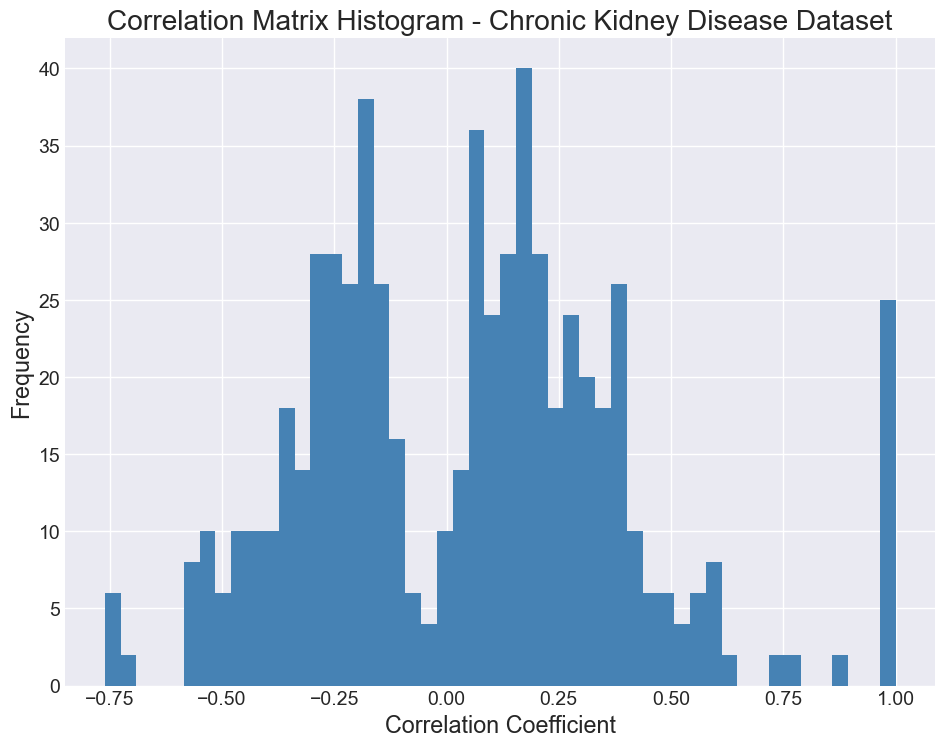

In [31]:
# Plot the correlation matrix as a histogram plot
plt.figure(figsize=(10, 8))
plt.hist(corr_df.values.flatten(), bins=50, color='steelblue')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.title('Correlation Matrix Histogram - Chronic Kidney Disease Dataset')

# Show feature names as x-tick labels
plt.grid(True)
plt.show()

In [32]:
# f,ax=plt.subplots(figsize=(25,25))
# sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=1,linecolor="orange")
# plt.xticks(rotation=45)
# plt.yticks(rotation=45)
# plt.title('Correlations between different predictors')
# plt.show()

In [33]:
df.corr()[-1:]

,Age,Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic_Kidney_Disease
Chronic_Kidney_Disease,0.23154,0.280065,-0.72931,0.622051,0.342151,-0.511718,-0.438443,0.265313,0.186871,0.412622,...,-0.732415,0.223707,-0.703764,0.590438,0.55906,0.236088,-0.393341,0.375154,0.325396,1.0


In [34]:
# Select relevant features
target_corr = abs(corr_df['Chronic_Kidney_Disease'])
relevant_features = target_corr[target_corr > 0.7]
relevant_features = relevant_features.drop('Chronic_Kidney_Disease', axis=0)
relevant_features = relevant_features.sort_values(ascending=False)

# Check for multicollinearity
features = list(relevant_features.index)
print(features)

['Hemoglobin (gms)', 'Packed Cell Volume', 'Specific Gravity', 'Red Blood Cells (millions/cmm)']


In [35]:
X_trans = df.drop(labels = 'Chronic_Kidney_Disease', axis = 1, inplace=False)
y_trans = df['Chronic_Kidney_Disease']

In [36]:
X_trans.head()

,Age,Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Hemoglobin (gms),Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia
0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,121.0,...,15.4,44.0,7800.0,5.200000,1.0,1.0,0.0,1.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,272.0,...,11.3,38.0,6000.0,4.766667,0.0,0.0,0.0,1.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,9.6,31.0,7500.0,4.333333,0.0,1.0,0.0,0.0,0.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,11.2,32.0,6700.0,3.900000,1.0,0.0,0.0,0.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,11.6,35.0,7300.0,4.600000,0.0,0.0,0.0,1.0,0.0,0.0


In [37]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_trans, y_trans)

In [38]:
y_smote.value_counts()

1    250
0    250
Name: Chronic_Kidney_Disease, dtype: int64

In [39]:
X_corr = X_smote[features]
y_corr = y_smote

In [40]:
y_corr.value_counts()

1    250
0    250
Name: Chronic_Kidney_Disease, dtype: int64

In [41]:
X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split(X_corr, y_corr, test_size = 0.2, random_state = 42)

In [42]:
y_train_corr.value_counts()

1    204
0    196
Name: Chronic_Kidney_Disease, dtype: int64

# Modelling


In [43]:
def display_confusion_matrix(y_test,y_pred):
  cm = confusion_matrix(y_test, y_pred)
  group_names = ["True Neg","False Pos","False Neg","True Pos"]
  group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")
  print(classification_report(y_test, y_pred))

In [44]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


lr = LogisticRegression(solver = 'liblinear')

Test Accuracy of Logistic Regression is 0.95 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        54
           1       1.00      0.89      0.94        46

    accuracy                           0.95       100
   macro avg       0.96      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100

Model runtime: -0.00 seconds


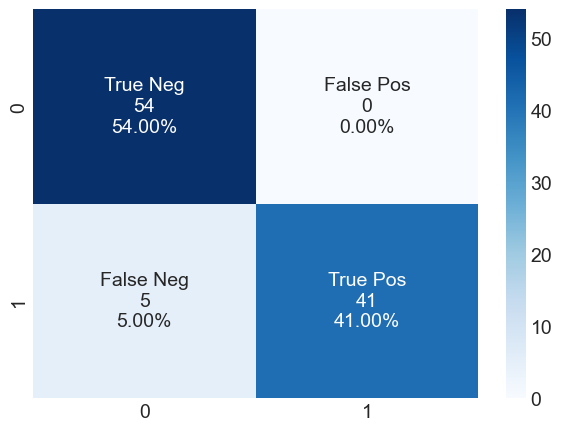

In [45]:
start_time = time.time()

lr_model = lr.fit(X_train_corr, y_train_corr)

# accuracy score, confusion matrix and classification report of decision tree
end_time = time.time()

print(f"Test Accuracy of Logistic Regression is {accuracy_score(y_test_corr, lr_model.predict(X_test_corr))} \n")
display_confusion_matrix(y_test_corr, lr_model.predict(X_test_corr))
print("Model runtime: {:.2f} seconds".format(start_time - end_time))

In [46]:
coefficients = lr_model.coef_[0]
feature_names = X_corr.columns
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df.sort_values(by='Coefficient', ascending=False, inplace=True)
coefficients_df

,Feature,Coefficient
2,Specific Gravity,5.607850
1,Packed Cell Volume,-0.070328
0,Hemoglobin (gms),-0.471847
3,Red Blood Cells (millions/cmm),-0.531441


In [47]:
start_time = time.time()

cv_scores_lr = cross_val_score(lr_model, X_corr, y_corr, cv=10, scoring='accuracy')

end_time = time.time()

print("Cross-validation scores:\n", cv_scores_lr)
print("Mean CV accuracy: {:.4f}".format(np.mean(cv_scores_lr)))
print("Standard deviation accuracy: {:.4f}".format(np.std(cv_scores_lr)))

print("Model runtime: {:.2f} seconds".format(start_time - end_time))

Cross-validation scores:
 [0.96 0.98 0.88 0.96 0.9  0.98 0.88 1.   0.94 0.94]
Mean CV accuracy: 0.9420
Standard deviation accuracy: 0.0404
Model runtime: -0.03 seconds


In [48]:
cv_f1_lr = cross_val_score(lr_model, X_corr, y_corr, cv=10, scoring= make_scorer(f1_score))
cv_precision_lr = cross_val_score(lr_model, X_corr, y_corr, cv=10, scoring=make_scorer(precision_score))

print("Cross-validation f1-score:\n", cv_f1_lr)
print("Mean CV f1-score: {:.4f}".format(np.mean(cv_f1_lr)))
print("Standard deviation f1-score: {:.4f}".format(np.std(cv_f1_lr)))

print("Cross-validation precision:\n", cv_precision_lr)
print("Mean CV precision: {:.4f}".format(np.mean(cv_precision_lr)))
print("Standard deviation precision: {:.4f}".format(np.std(cv_precision_lr)))

Cross-validation f1-score:
 [0.95833333 0.97959184 0.86363636 0.95833333 0.88888889 0.97959184
 0.86363636 1.         0.93617021 0.93617021]
Mean CV f1-score: 0.9364
Standard deviation f1-score: 0.0465
Cross-validation precision:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean CV precision: 1.0000
Standard deviation precision: 0.0000


In [49]:
X = df.drop(labels = 'Chronic_Kidney_Disease', axis = 1, inplace=False)
y = df['Chronic_Kidney_Disease']

In [50]:
smote = SMOTE(random_state=42)
X_smote_tune, y_smote_tune = smote.fit_resample(X, y)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_smote_tune, y_smote_tune, test_size = 0.2, random_state = 42)

# Feature Selection

## Principal Component Analyst

In [52]:
from sklearn.decomposition import PCA

Test Accuracy of Logistic Regression PCA is 0.98 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       1.00      0.96      0.98        46

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

Model runtime: -0.01 seconds


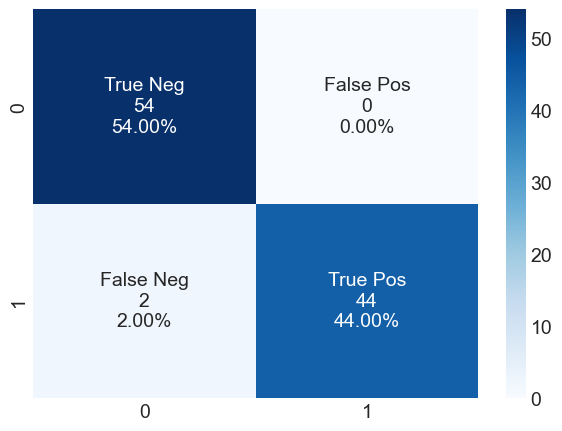

In [53]:
start_time = time.time()

pca_lr = PCA(n_components=7)
X_train_pca_lr = pca_lr.fit_transform(X_train)
X_test_pca_lr = pca_lr.transform(X_test)


# Train a logistic regression model on the reduced feature set
model_lr = LogisticRegression(solver='liblinear')
model_lr.fit(X_train_pca_lr, y_train)

end_time = time.time()

# Evaluate the performance of the model
print(f"Test Accuracy of Logistic Regression PCA is {accuracy_score(y_test, model_lr.predict(X_test_pca_lr))} \n")
display_confusion_matrix(y_test, model_lr.predict(X_test_pca_lr))
print("Model runtime: {:.2f} seconds".format(start_time - end_time))

In [54]:
start_time = time.time()

cv_scores_lr = cross_val_score(model_lr, X_smote_tune, y_smote_tune, cv=10, scoring='accuracy')

end_time = time.time()

print("Cross-validation scores:\n", cv_scores_lr)
print("Mean CV accuracy: {:.4f}".format(np.mean(cv_scores_lr)))
print("Standard deviation accuracy: {:.4f}".format(np.std(cv_scores_lr)))

print("Model runtime: {:.2f} seconds".format(start_time - end_time))

Cross-validation scores:
 [0.98 1.   1.   1.   0.98 1.   0.98 0.98 0.96 1.  ]
Mean CV accuracy: 0.9880
Standard deviation accuracy: 0.0133
Model runtime: -0.05 seconds


In [55]:
cv_f1_lr = cross_val_score(model_lr, X_smote_tune, y_smote_tune, cv=10, scoring= make_scorer(f1_score))
cv_precision_lr = cross_val_score(model_lr, X_smote_tune, y_smote_tune, cv=10, scoring=make_scorer(precision_score))

print("Cross-validation f1-score:\n", cv_f1_lr)
print("Mean CV f1-score: {:.4f}".format(np.mean(cv_f1_lr)))
print("Standard deviation f1-score: {:.4f}".format(np.std(cv_f1_lr)))

print("Cross-validation precision:\n", cv_precision_lr)
print("Mean CV precision: {:.4f}".format(np.mean(cv_precision_lr)))
print("Standard deviation precision: {:.4f}".format(np.std(cv_precision_lr)))

Cross-validation f1-score:
 [0.97959184 1.         1.         1.         0.97959184 1.
 0.97959184 0.97959184 0.95833333 1.        ]
Mean CV f1-score: 0.9877
Standard deviation f1-score: 0.0137
Cross-validation precision:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean CV precision: 1.0000
Standard deviation precision: 0.0000
